# Data Exploration

## Imports

In [11]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display
import plotly.graph_objects as go

import sys
import os

sys.path.append(os.path.abspath(".."))

from src.process_data import processData

## Load Data

In [12]:
data = pd.read_csv('../data/train.csv', index_col=None)
data = processData(data)
data.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,target,closing_return,spread
0,1525471260,0.90120,0.90130,0.90120,0.90130,134.98,121.646459,4.0,125.08,112.723589,True,NaN,0.00010
1,1525471320,0.90185,0.90195,0.90185,0.90195,1070.54,965.505313,12.0,879.94,793.612703,False,0.000721,0.00010
2,1525471380,0.90140,0.90140,0.90139,0.90139,2293.06,2066.963991,5.0,0.00,0.000000,False,-0.000621,0.00001
3,1525471440,0.90139,0.90140,0.90138,0.90139,6850.59,6175.000909,19.0,1786.30,1610.149485,False,0.000000,0.00002
4,1525471500,0.90139,0.90139,0.90130,0.90130,832.30,750.222624,3.0,784.82,707.428900,False,-0.000100,0.00009


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122438 entries, 0 to 2122437
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   timestamp               int64  
 1   open                    float64
 2   high                    float64
 3   low                     float64
 4   close                   float64
 5   volume                  float64
 6   quote_asset_volume      float64
 7   number_of_trades        float64
 8   taker_buy_base_volume   float64
 9   taker_buy_quote_volume  float64
 10  target                  bool   
 11  closing_return          float64
 12  spread                  float64
dtypes: bool(1), float64(11), int64(1)
memory usage: 196.3 MB


In [14]:
data.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,closing_return,spread
count,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122438e+06,2.122437e+06,2.122438e+06
mean,1.589144e+09,4.971020e-01,4.976028e-01,4.965936e-01,4.971011e-01,2.484890e+05,1.650106e+05,2.121758e+02,1.237279e+05,8.230815e+04,1.168483e-06,1.009171e-03
std,3.676171e+07,3.147919e-01,3.152553e-01,3.143317e-01,3.147945e-01,6.416383e+05,4.887013e+05,5.372650e+02,3.249252e+05,2.488676e+05,1.741058e-03,1.747660e-03
min,1.525471e+09,1.057300e-01,1.068400e-01,1.012900e-01,1.058900e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.530164e-01,0.000000e+00
25%,1.557308e+09,2.676100e-01,2.678200e-01,2.673900e-01,2.676000e-01,2.498430e+04,7.835293e+03,2.700000e+01,1.083690e+04,3.409231e+03,-5.406265e-04,2.100000e-04
50%,1.589144e+09,3.629800e-01,3.633400e-01,3.626000e-01,3.629700e-01,7.833306e+04,2.853193e+04,6.800000e+01,3.622145e+04,1.362004e+04,0.000000e+00,5.000000e-04
75%,1.620981e+09,6.572000e-01,6.579550e-01,6.563000e-01,6.572000e-01,2.334948e+05,1.315786e+05,1.970000e+02,1.145778e+05,6.322541e+04,5.359057e-04,1.100000e-03
max,1.652817e+09,1.964710e+00,1.966890e+00,1.958350e+00,1.964710e+00,6.366178e+07,3.556471e+07,4.053500e+04,3.087021e+07,1.602615e+07,1.351721e-01,1.465900e-01


## Some Charts

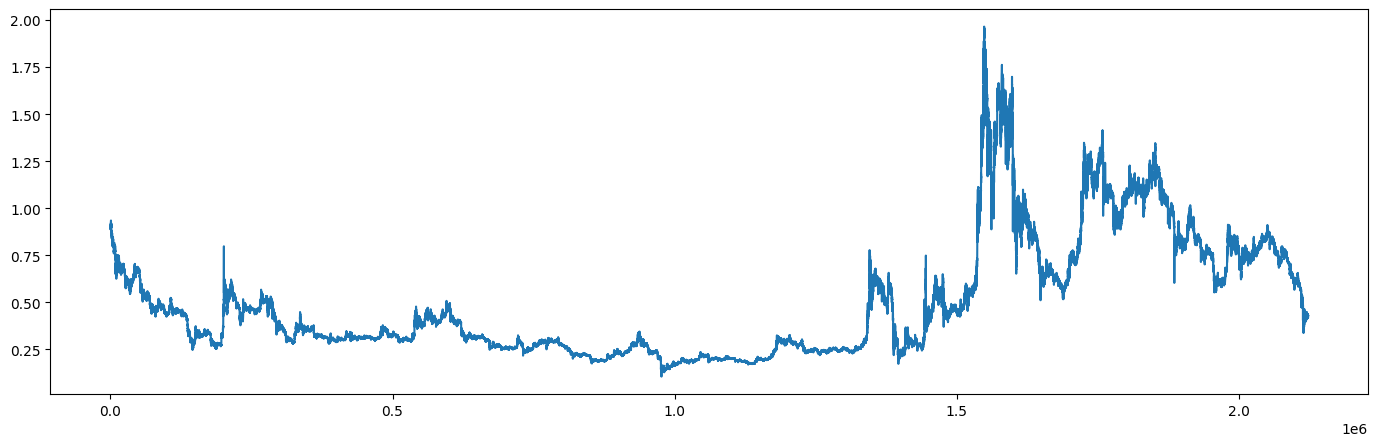

In [15]:
plt.figure(figsize=(17,5))
data['close'].plot()
plt.show()

It might be useful to look at percent returns over the last period, that way we can eliminate serial correlation and just predict whether the next return will be above 0 or not. It's pretty dense, so plotly will allow us to zoom in and look at different sections

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['closing_return'], mode='lines', name='Time Series'))

# Add title and labels
fig.update_layout(
    title="Returns Series",
    xaxis_title="Time Stamp",
    yaxis_title="Returns",
    xaxis_rangeslider_visible=True,  # Adds a range slider for zooming
)

# Display the figure
fig.show()

Let's also inspect volume:

In [ ]:
data['volume'].plot()
plt.ylabel('Volume')
plt.xlabel('Time')
plt.ylim(0, 70000000)
plt.xlim(0, data.shape[0])
plt.title('Volume')
plt.show()

Volume is very sporratic, so it might be difficult to compare the first half of the training data with the latter half because of their extremely different volatilities. However, it could still be a useful input for determining price direction.